In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import pickle

In [2]:
datos_trafico= pd.read_csv('datos_trafico_t_f_datos_aforados2Semestre2019.csv',usecols = ['t_f_datos_aforados_pm.idta','t_f_datos_aforados_pm.descripcion','t_f_datos_aforados_pm.hora','t_f_datos_aforados_pm.intensidad','t_f_datos_aforados_pm.ocupacion','t_f_datos_aforados_pm.velocidad'])

In [3]:
datos_trafico.head()

,t_f_datos_aforados_pm.idta,t_f_datos_aforados_pm.descripcion,t_f_datos_aforados_pm.hora,t_f_datos_aforados_pm.intensidad,t_f_datos_aforados_pm.ocupacion,t_f_datos_aforados_pm.velocidad
0,26,"MARÍA CRISTINA, Nº 1 (del giro de C/ San Vicen...",2019-07-01 00:00:00.0,26,0,12
1,1396,CV - 315 (BENIFARAIG) sentido VALENCIA,2019-07-01 00:00:00.0,124,0,24
2,1104,AV. CONSTITUCIÓN Nº 188 (de Coronel Montesinos...,2019-07-01 00:00:00.0,38,0,11
3,990,"AV. CONSTITUCIÓN, Nº 188 (de Pl. D. Bosco a Co...",2019-07-01 00:00:00.0,112,0,11
4,992,"CONDE LUMIARES, Nº 22 (Pl. Tosal del Rey a Ped...",2019-07-01 00:00:00.0,126,1,14


In [4]:
datos_trafico.rename(columns={'t_f_datos_aforados_pm.idta':'idTramo', 't_f_datos_aforados_pm.descripcion':'descripcion', 
't_f_datos_aforados_pm.hora':'datetime','t_f_datos_aforados_pm.intensidad':'intensidad','t_f_datos_aforados_pm.ocupacion':'ocupacion'
                           ,'t_f_datos_aforados_pm.velocidad':'velocidad'}, 
                  inplace=True)

In [5]:
datos_trafico.head()

,idTramo,descripcion,datetime,intensidad,ocupacion,velocidad
0,26,"MARÍA CRISTINA, Nº 1 (del giro de C/ San Vicen...",2019-07-01 00:00:00.0,26,0,12
1,1396,CV - 315 (BENIFARAIG) sentido VALENCIA,2019-07-01 00:00:00.0,124,0,24
2,1104,AV. CONSTITUCIÓN Nº 188 (de Coronel Montesinos...,2019-07-01 00:00:00.0,38,0,11
3,990,"AV. CONSTITUCIÓN, Nº 188 (de Pl. D. Bosco a Co...",2019-07-01 00:00:00.0,112,0,11
4,992,"CONDE LUMIARES, Nº 22 (Pl. Tosal del Rey a Ped...",2019-07-01 00:00:00.0,126,1,14


In [6]:
datos_trafico.dtypes

idTramo         int64
descripcion    object
datetime       object
intensidad      int64
ocupacion       int64
velocidad       int64
dtype: object

In [7]:
datos_trafico['datetime'] = pd.to_datetime(datos_trafico['datetime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
datos_trafico.dtypes

idTramo                 int64
descripcion            object
datetime       datetime64[ns]
intensidad              int64
ocupacion               int64
velocidad               int64
dtype: object

No hay ningún NaN

In [9]:
print(datos_trafico.isnull() == True )
print(datos_trafico.isnull().values.any())

          idTramo  descripcion  datetime  intensidad  ocupacion  velocidad
0           False        False     False       False      False      False
1           False        False     False       False      False      False
2           False        False     False       False      False      False
3           False        False     False       False      False      False
4           False        False     False       False      False      False
...           ...          ...       ...         ...        ...        ...
27226658    False        False     False       False      False      False
27226659    False        False     False       False      False      False
27226660    False        False     False       False      False      False
27226661    False        False     False       False      False      False
27226662    False        False     False       False      False      False

[27226663 rows x 6 columns]
False


In [10]:
len(datos_trafico)

27226663

In [11]:
max(datos_trafico['datetime'])

Timestamp('2019-12-05 17:10:00')

In [12]:
min(datos_trafico['datetime'])

Timestamp('2019-07-01 00:00:00')

In [13]:
datos_trafico.to_pickle('trafico_2semestre2019.plk')

In [14]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#El siguiente gráfico, que no es el que mejor muestra los datos, el que hay detrás sería mejor, le cuesta muchísimo 
#a mi ordenador de renderizar, TARDA UN CUARTO DE HORA 15M

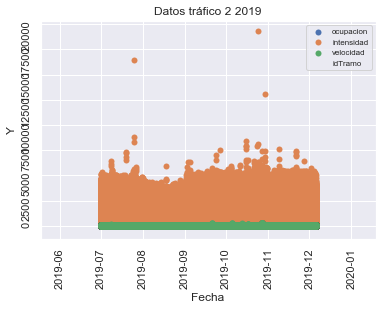

In [15]:
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.xlabel("Fecha")
plt.ylabel("Y")
plt.title("Datos tráfico 2 2019")
colores = ['#FFD700','#C0C0C0','#8C7853', '#4C7853']
h = plt.scatter(datos_trafico['datetime'],datos_trafico['ocupacion'],linewidths=0)
p = plt.scatter(datos_trafico['datetime'],datos_trafico['intensidad'],linewidths=0)
z = plt.scatter(datos_trafico['datetime'],datos_trafico['velocidad'],linewidths=0)
id = plt.scatter(datos_trafico['datetime'],datos_trafico['idTramo'],linewidths=0, alpha=0.0)

plt.legend((h, p, z, id),
           ('ocupacion', 'intensidad', 'velocidad', 'idTramo'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)
plt.show()

El siguiente gráfico, mi ordenador no tiene bastantes recursos para dibujarlo

In [ ]:
n_groups = len(datos_trafico['datetime'])
means_ocupacion = datos_trafico['ocupacion']
means_intensidad = datos_trafico['intensidad']
means_velocidad = datos_trafico['velocidad']
means_idTramo = datos_trafico['idTramo']

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, means_ocupacion, bar_width,
alpha=opacity,
color='b',
label='ocupacion')

rects2 = plt.bar(index + bar_width, intensidad, bar_width,
alpha=opacity,
color='g',
label='intensidad')

rects3 = plt.bar(index + bar_width, means_velocidad, bar_width,
alpha=opacity,
color='d',
label='velocidad')

rects4 = plt.bar(index + bar_width, means_idTramo, bar_width,
alpha=opacity,
color='e',
label='idTramo')

fechas = (datos_trafico['datetime'])

plt.xlabel('Fechas')
plt.ylabel('Valor')
plt.title('Valores por Fecha')
plt.xticks(index + bar_width, fechas)
plt.legend()

plt.tight_layout()
plt.show()

AGRUPACION POR LA MEDIA DE OCUPACION Y VELOCIDAD POR HORA POR TRAMOS DEL TRÁFICO

In [5]:
trafico_2semestre2019=pd.read_pickle('trafico_2semestre2019.plk')

In [6]:
trafico_2semestre2019.rename(columns={ 'datetime':'fechahora'}, inplace=True)
trafico_2semestre2019.head()

,idTramo,descripcion,fechahora,intensidad,ocupacion,velocidad
0,26,"MARÍA CRISTINA, Nº 1 (del giro de C/ San Vicen...",2019-07-01,26,0,12
1,1396,CV - 315 (BENIFARAIG) sentido VALENCIA,2019-07-01,124,0,24
2,1104,AV. CONSTITUCIÓN Nº 188 (de Coronel Montesinos...,2019-07-01,38,0,11
3,990,"AV. CONSTITUCIÓN, Nº 188 (de Pl. D. Bosco a Co...",2019-07-01,112,0,11
4,992,"CONDE LUMIARES, Nº 22 (Pl. Tosal del Rey a Ped...",2019-07-01,126,1,14


In [7]:
trafico_2semestre2019['fecha']=pd.to_datetime(trafico_2semestre2019['fechahora'],format='%Y/%d/%m')
trafico_2semestre2019['hora']=trafico_2semestre2019['fechahora'].dt.time
trafico_2semestre2019['hora'] = pd.to_datetime(trafico_2semestre2019['hora'], format='%H:%M:%S')

Creo los campos fecha y hora para borrar el campo fechahora ya que luego necesitaré que estos campos esten por separado

In [8]:
trafico_2semestre2019.tail()

,idTramo,descripcion,fechahora,intensidad,ocupacion,velocidad,fecha,hora
27226658,701,"GUILLEM DE CASTRO, Nº 140 (de Pte. de las Arte...",2019-12-05 12:10:00,952,3,46,2019-12-05 12:10:00,1900-01-01 12:10:00
27226659,703,"BLANQUERIAS, Nº 24 (de Pte. San José a Torres ...",2019-12-05 12:10:00,853,3,47,2019-12-05 12:10:00,1900-01-01 12:10:00
27226660,713,"Pº PECHINA, Nº 1 (de Turia a Guillem de Castro)",2019-12-05 12:10:00,212,2,30,2019-12-05 12:10:00,1900-01-01 12:10:00
27226661,714,"BORRULL, s/n (de G.V. Fernando el Católico a D...",2019-12-05 12:10:00,176,4,19,2019-12-05 12:10:00,1900-01-01 12:10:00
27226662,716,"MURILLO, Nº 54 (de Aladrers a Guillem de Castro)",2019-12-05 12:10:00,251,22,8,2019-12-05 12:10:00,1900-01-01 12:10:00


In [9]:
trafico_2semestre2019.drop(['fechahora'], axis=1, inplace=True)

In [10]:
trafico_2semestre2019.dtypes

idTramo                 int64
descripcion            object
intensidad              int64
ocupacion               int64
velocidad               int64
fecha          datetime64[ns]
hora           datetime64[ns]
dtype: object

In [11]:
trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad = trafico_2semestre2019.groupby([
    trafico_2semestre2019['idTramo'],
    trafico_2semestre2019['descripcion'],
    trafico_2semestre2019['fecha'].dt.date,
    trafico_2semestre2019['hora'].dt.hour]).agg({'intensidad': ['count','mean'],
                                                      'ocupacion': ['count','mean'], 
                                                      'velocidad':['count','mean']}).reset_index()

He agrupado por tramo, descripcion, fecha y hora. Dentro de cada hora hay 6 medidas, 1 cada 10 minutos, las agrego por count y media. Agrego Media y count de intensidad, ocupacion y velocidad. La función reset_index permite mantener en el dataframe las columnas que no son la agregacion (idTramo, descripcion, fecha, hora)

In [12]:
trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad.head()

idTramo                                        descripcion       fecha hora  \
                                                                                
0       1  PINTOR SOROLLA, Nº 1 (de Poeta Querol a Univer...  2019-07-01    0   
1       1  PINTOR SOROLLA, Nº 1 (de Poeta Querol a Univer...  2019-07-01    1   
2       1  PINTOR SOROLLA, Nº 1 (de Poeta Querol a Univer...  2019-07-01    2   
3       1  PINTOR SOROLLA, Nº 1 (de Poeta Querol a Univer...  2019-07-01    3   
4       1  PINTOR SOROLLA, Nº 1 (de Poeta Querol a Univer...  2019-07-01    4   

  intensidad             ocupacion           velocidad             
       count        mean     count      mean     count       mean  
0          6  292.500000         6  0.666667         6  20.333333  
1          6  123.000000         6  0.000000         6   8.333333  
2          6   74.166667         6  0.000000         6   4.166667  
3          6   42.500000         6  0.000000         6   1.833333  
4          6   35.000000         6  0.000000         6   2.000000

In [13]:
trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad.to_csv(r'trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad.csv', index = False)

In [14]:
trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad.to_pickle('trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad.plk')

In [15]:
trafico_2semestre2019=pd.read_pickle('trafico_2semestre2019_por_tramos_y_descripcion_media_horas_intensidad_ocupacion_velocidad.plk')